Iteration 1
Weak Learner Predictions: [-0.3321587 -0.3321587 -0.3321587 -0.3321587 -0.3321587]
Updated Model Predictions: [1.73978823 1.73978823 1.73978823 1.73978823 1.73978823]

Iteration 1001
Weak Learner Predictions: [ 0.01546651 -0.00112111 -0.00112111  0.01546651 -0.00112111]
Updated Model Predictions: [1.29465539 2.7600497  1.99175445 0.78140189 1.07533004]

Iteration 2001
Weak Learner Predictions: [-0.00126019 -0.00126019 -0.00126019 -0.00126019 -0.00126019]
Updated Model Predictions: [1.29297315 2.74887357 1.95573558 0.76180496 1.0076695 ]

Iteration 3001
Weak Learner Predictions: [-0.00040019 -0.00040019 -0.00040019 -0.00040019 -0.00040019]
Updated Model Predictions: [1.30756391 2.78301969 1.95872916 0.76485876 1.00803467]

Iteration 4001
Weak Learner Predictions: [-0.00324695  0.00175199 -0.00324695  0.00175199  0.00175199]
Updated Model Predictions: [1.29083717 2.77532438 1.96320687 0.757854   0.98243221]

Iteration 5001
Weak Learner Predictions: [-7.80660052e-05 -7.8066005

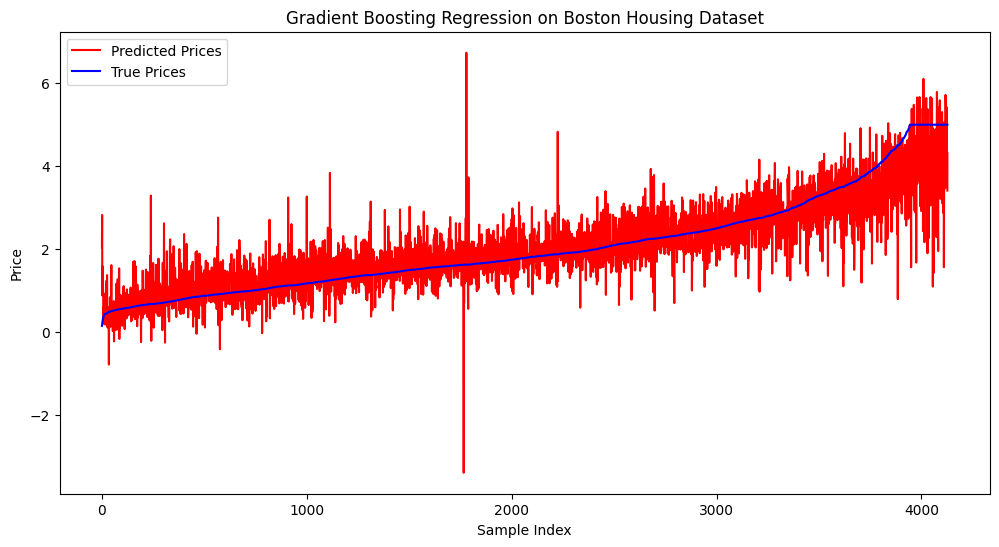

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
#from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Boston Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target


# Number of boosting iterations
n_estimators = 10000

# Define your loss function L(y, F(x))
def loss_function(y_true, y_pred):
    # Example: squared error loss
    return np.mean((y_true - y_pred) ** 2)

# Function to compute negative gradients (pseudo-residuals)
def compute_pseudo_residuals(y_true, y_pred):
    # Example: gradient of squared error loss
    return  y_true - y_pred

# Function for line search to find the optimal multiplier gamma_m
def line_search(y_true, F_prev, h_m):
    numerator = np.sum(compute_pseudo_residuals(y_true, F_prev ) * h_m)
    denominator = np.sum(h_m ** 2)
    
    # To avoid division by zero, add a small epsilon
    epsilon = 1e-10
    gamma_m = numerator / (denominator + epsilon)
    
    return gamma_m

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Now use y_train_scaled in your Gradient Boosting Machine algorithm
# # Initialize the model with a constant value that minimizes the average loss
gamma_initial = np.mean(y_train)  # Initialize with the mean of y_train_scaled
F_m = np.full_like(y_train, gamma_initial)

# Number of iterations (M)
n_estimators = 10000

# Initialize lists to store models and weights (gammas)
models = []
weights = []

# Gradient Boosting Machine algorithm
for m in range(n_estimators):
    # Calculate residuals (pseudo-residuals)
    residuals = compute_pseudo_residuals(y_train, F_m)

    # Fit a weak learner (decision stump, for simplicity)
    tree = DecisionTreeRegressor(max_depth=1)  # Weak learner (stump)
    tree.fit(X_train, residuals)

    # Predictions of the weak learner
    h_m = tree.predict(X_train)
    #print(f"Weak Learner Predictions: {h_m[:5]}")
    # Compute the multiplier (gamma_m)
    gamma_m = line_search(y_train, F_m, h_m)

    # Update the model F_m(x)
    F_m += gamma_m * h_m
    #print(f"Updated Model Predictions: {F_m[:5]}")

    # Store the weak learner and its weight
    models.append(tree)
    weights.append(gamma_m)

    if m % 1000 == 0 or m == n_estimators - 1:
        print(f"Iteration {m + 1}")
        print(f"Weak Learner Predictions: {h_m[:5]}")
        print(f"Updated Model Predictions: {F_m[:5]}")
        print()
        

# Evaluate the model on the test set
F_test = np.full(y_test.shape, gamma_initial)
for model, weight in zip(models, weights):
    F_test += weight * model.predict(X_test)

mse = np.mean((y_test - F_test) ** 2)
print(f"Mean Squared Error on test set: {mse}")

# Sort the test set for plotting
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test[sorted_indices]
F_test_sorted = F_test[sorted_indices]

# Plot the true vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(F_test_sorted, label='Predicted Prices', color='red')
plt.plot(y_test_sorted, label='True Prices', color='blue')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.title('Gradient Boosting Regression on Boston Housing Dataset')
plt.show()
